In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.io as sio
import os
import scipy.stats as stats 
from scipy.ndimage import gaussian_filter

# Place Preference

In [76]:
# Mouse IDs
gtacr = [4, 9, 10, 12, 13]
tdtomato = [1, 2, 3, 6, 7, 11]
bipac = [17, 18, 21, 26, 27]
tdtomato2 = [14, 15, 19, 20, 24, 25]

gtacr_fed_folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/optogenetics/gtacr place preference/gtacr_placepref_fed'
gtacr_fasted_folder = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/optogenetics/gtacr place preference/gtacr_placepref_fasted'

bipac_folder = "/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/optogenetics/bipac place preference/bipac_placepref_1mWstim_2sstimq10s"


## Functions

In [53]:
def sanity_check(ts):
    total_t = np.sum(np.diff(ts))
    if total_t != ts[0, -1]:
        print("bruh")

def process_file(path):
    file = sio.loadmat(path)
    centroid = file['largeCentroid'][1:, ]
    side = file['largeCentroid'][1:, 2]
    ts = file['toccer']
    dt = np.diff(ts)[0]
    sanity_check(ts)
    # print(np.sum(dt[side == 1]) + np.sum(dt[side == 0]))
    prop_time_spent_laserside = np.sum(dt[side == 1]) / np.sum(np.diff(ts))
    coords_laser = centroid[centroid[:, 2] == 1, 0:2]

    return centroid, prop_time_spent_laserside, coords_laser

def process_folder(folder_path, ctrl_id, expt_id, plot=False, axes=False, bipac=False):
    t_spent_ctrl = []
    t_spent_expt = []
    i = 0
    for file in os.listdir(folder_path):
        if file.endswith(".mat"):
            if not bipac:
                animal_no = int(file.rsplit("GtACR#")[1].rsplit('_')[0])
            else:
                animal_no = int(file.rsplit("2024")[0])
            centroid, prop_time_spent_laserside, coords_laser = process_file(os.path.join(folder_path, file))
            if animal_no in ctrl_id:
                t_spent_ctrl.append(prop_time_spent_laserside)
            elif animal_no in expt_id:
                t_spent_expt.append(prop_time_spent_laserside)
            if plot:
                plot_heatmap(centroid, sigma = 1, ax = axes[i])
            if axes:
                i += 1
    return t_spent_ctrl, t_spent_expt, axes

def plot_basic_coords(centroid, coords_laser, ax = False):
    if not ax:
        fig, ax = plt.subplots(1)
    ax.scatter(x = centroid[:, 0], y = centroid[:, 1], c = "gray")
    ax.scatter(x = coords_laser[:, 0], y = coords_laser[:, 1], c = "blue")
    return ax

def plot_heatmap(centroid, sigma = 1, ax = False, cmap = 'binary'):
    tmp_centroid = centroid
    all_x = centroid[:, 0]
    all_y = centroid[:, 1]
    histo, x_bins, y_bins = np.histogram2d(all_y, all_x, bins = [400, 640])
    histoblur = gaussian_filter(histo, sigma=1)
    if not ax:
        fig, ax = plt.subplots()
    ax.imshow(histoblur, cmap=cmap, origin='lower', aspect='auto')
    for im in plt.gca().get_images():
        im.set_clim(0, 1)
    ax.axvline(x=320, color='gray', linewidth=1, ls = '--')
    ax.axis('off')
    return ax

## Representative - GtACR

gtacr_placeprefGtACR#7_10192420241019T143400.mat


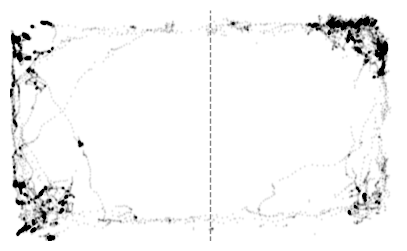

In [103]:
centroid, prop_time_spent_laserside, coords_laser = process_file(os.path.join(gtacr_fed_folder, os.listdir(gtacr_fed_folder)[5]))

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
fig, ax = plt.subplots(1, figsize = (5, 3))
print(os.listdir(gtacr_fed_folder)[5])
# plot_basic_coords(centroid, coords_laser, ax = ax1)
plot_heatmap(centroid, sigma = 1, ax = ax)
ax.set_xlim(right = 620)
ax.set_ylim(bottom = 20, top = 320)
# ax.get_xlim()
plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/optogenetics/opto representative/gtacr7td_placepref.pdf')

gtacr_placeprefGtACR#4_10192420241019T135731.mat


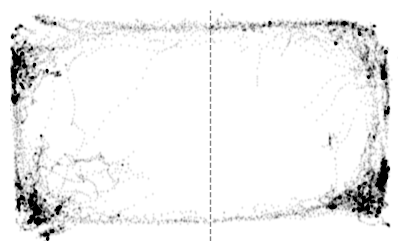

In [116]:
centroid, prop_time_spent_laserside, coords_laser = process_file(os.path.join(gtacr_fed_folder, os.listdir(gtacr_fed_folder)[3]))

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
fig, ax = plt.subplots(1, figsize = (5, 3))
print(os.listdir(gtacr_fed_folder)[3])
# plot_basic_coords(centroid, coords_laser, ax = ax1)
plot_heatmap(centroid, sigma = 1, ax = ax)
ax.set_xlim(right = 620)
ax.set_ylim(bottom = 60, top = 345)
# ax.get_xlim()
plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/optogenetics/opto representative/gtacr4g_placepref.pdf')

In [ ]:
for file in os.listdir(gtacr_fed_folder):
    if file.endswith(".mat"):
        fullpath = os.path.join(gtacr_fed_folder, file)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
        fig.suptitle(file)
        centroid, prop_time_spent_laserside, coords_laser = process_file(fullpath)
        plot_basic_coords(centroid, coords_laser, ax = ax1)
        plot_heatmap(centroid, sigma = 1, ax = ax2)

## Quantifications - GtACR

In [ ]:
t_spent_td, t_spent_gtacr, axes = process_folder(gtacr_fed_folder, tdtomato, gtacr, bipac=False)
np.asarray(t_spent_td), np.asarray(t_spent_gtacr)

(array([0.39099679, 0.5342919 , 0.48999585, 0.87363324, 0.79489664,
        0.06599569]),
 array([0.96443586, 0.27097915, 0.24602677, 0.39882676]))

In [88]:
t_spent_td, t_spent_gtacr, axes = process_folder(gtacr_fed_folder, tdtomato, gtacr, bipac=False)
np.asarray(t_spent_td), np.asarray(t_spent_gtacr)

(array([0.39099679, 0.5342919 , 0.48999585, 0.87363324, 0.79489664,
        0.06599569]),
 array([0.96443586, 0.5050562 , 0.27097915, 0.24602677, 0.39882676]))

In [87]:
t_spent_td, t_spent_gtacr, axes = process_folder(gtacr_fasted_folder, tdtomato, gtacr, bipac=False)
np.asarray(t_spent_td), np.asarray(t_spent_gtacr)

(array([0.7397685 , 0.08425588, 0.58071866, 0.5147908 , 0.85748395,
        0.14103239]),
 array([0.30446922, 0.5255912 , 0.80149101, 0.49370683, 0.35079145]))

# Representative - biPAC

1920241126T151526.mat


(60.0, 399.5)

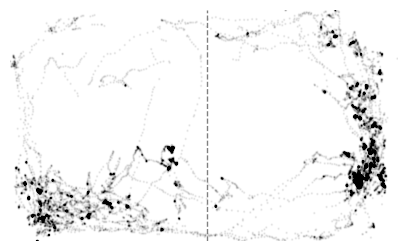

In [72]:
centroid, prop_time_spent_laserside, coords_laser = process_file(os.path.join(bipac_folder, os.listdir(bipac_folder)[-1]))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
fig, ax = plt.subplots(1, figsize = (5, 3))
print(os.listdir(bipac_folder)[-1])
# plot_basic_coords(centroid, coords_laser, ax = ax1)
plot_heatmap(centroid, sigma = 1, ax = ax)
ax.set_xlim(right = 630)
ax.set_ylim(bottom = 60)
# ax.get_ylim()
# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/optogenetics/opto representative/bipac19td_placepref.pdf')

2620241126T164007.mat


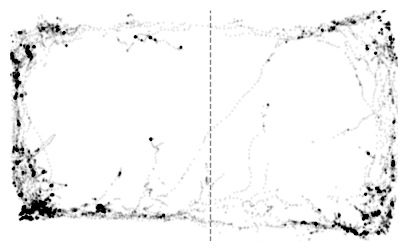

In [73]:
centroid, prop_time_spent_laserside, coords_laser = process_file(os.path.join(bipac_folder, os.listdir(bipac_folder)[1]))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
fig, ax = plt.subplots(1, figsize = (5, 3))
print(os.listdir(bipac_folder)[1])
# plot_basic_coords(centroid, coords_laser, ax = ax1)
plot_heatmap(centroid, sigma = 1, ax = ax, cmap = 'binary')
ax.set_xlim(right = 620)
ax.set_ylim(bottom = 60)
# ax.get_xlim()
plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/optogenetics/opto representative/bipac26b_placepref.pdf')

In [15]:
for file in os.listdir(bipac_folder):
    if file.endswith(".mat"):
        fullpath = os.path.join(bipac_folder, file)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
        fig.suptitle(file)
        centroid, prop_time_spent_laserside, coords_laser = process_file(fullpath)
        plot_basic_coords(centroid, coords_laser, ax = ax1)
        plot_heatmap(centroid, sigma = 1, ax = ax2)

# Quantifications - biPAC

In [75]:
t_spent_td, t_spent_gtacr, axes = process_folder(bipac_folder, tdtomato2, bipac, bipac=True)
np.asarray(t_spent_td), np.asarray(t_spent_gtacr)

(array([0.29955328, 0.55088161, 0.67897275, 0.48192885, 0.44998708,
        0.62244002]),
 array([0.42494427, 0.30770404, 0.28095815, 0.57964291, 0.63320514]))

array([0.29955328, 0.55088161, 0.67897275, 0.48192885, 0.44998708,
       0.62244002])